# BM 336027 - Technion - Medical Image Processing


## Homework 1 - Image Histograms & Filters 
Michal Appel
---

### <a style='color:red'> Due Date: 23.11.2022 </a>

---
###  Agenda

* [Exercise 0: Color Conversion](#Exercise-0)
* [Exercise 1: Histogram Equalization](#Exercise-1)
* [Exercise 2: Convolution & Filters](#Exercise-2)
* [Exercise 3: Bilateral Filter](#Exercise-3)

#### Use as many cells as you need

---
### Submission Guidelines

* **No handwritten submissions.** 
* What you have to submit:
    * You should submit this file only, with the name: `bm_hw1_id.ipynb`.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).


---

In [1]:
# imports you will need
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---

### **Assignment Instructions**
**In this assignment, you are allowed to use only basic numpy and matplotlib functions, and functions you implemented in other sections of the exercises**

---

###  Exercise 0

In this exercise, we want to convert an RGB image to a grayscale image. 

1. Implement the function `rgb2gray_mean` that takes in a three-channel RGB image in the form of a numpy array and returns a grayscale image which is the average value of the three channels (red, green, and blue) <br>
    Ensure that your function can be configured with channels first (3, H, W) or last (H, W, 3). <br>
    Write a description of your function and explain its inputs and output

In [2]:
def rgb2gray_mean(img: np.ndarray) -> np.ndarray:
    '''
    The function gets a 3-channel RGB image, avargae the values of all the channels and return it as a grayscale image.

    :param img: numpy array of RGB image
    :return img_gray: grayscale image- avarged 3 channels
    '''
    # ====== YOUR CODE: ======
    channel_idx = img.shape.index(3)
    img_gray = img.mean(axis=channel_idx)
    # ========================

    return img_gray

2. Averaging all the channels may not be the best way to apply this conversion. A more "human-oriented" way is taking the weighted average of the three channels according to the following equation:
$$ Y = 0.2125\cdot R + 0.7154\cdot G + 0.0721\cdot B $$
    look [here](https://www.baeldung.com/cs/convert-rgb-to-grayscale) for more information. <br>
    
    Implement the function `rgb2gray_weighted` that takes in a three-channel RGB image in the form of a numpy array and returns a grayscale image according to the above equation.<br>
    Ensure that your function can be configured with channels first (3, H, W) or last (H, W, 3). <br>
    Write a description of your function and explain its inputs and output.

In [3]:
def rgb2gray_weighted(img: np.ndarray) -> np.ndarray:
    '''
    The function gets a three-channel RGB image, calculating the weighted average of the channels and return a grayscale.

    :param img: numpy array of RGB image
    :return img_gray: grayscale image- weighted 3-channel averaged
    '''
    # ====== YOUR CODE: ======
    channel_idx = img.shape.index(3)

    if channel_idx == 0:
        r, g, b = img[0,:,:], img[1,:,:], img[2,:,:]

    elif channel_idx == 2:
        r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]

    img_gray = 0.2125*r + 0.7154*g + 0.0721*b
    # ========================

    return img_gray

3. Load the colored image 'retina.jpg' and convert it to grayscale using the above two functions you implemented.<br>
    Display the colored image and the two grayscaled images in one figure and add titles.

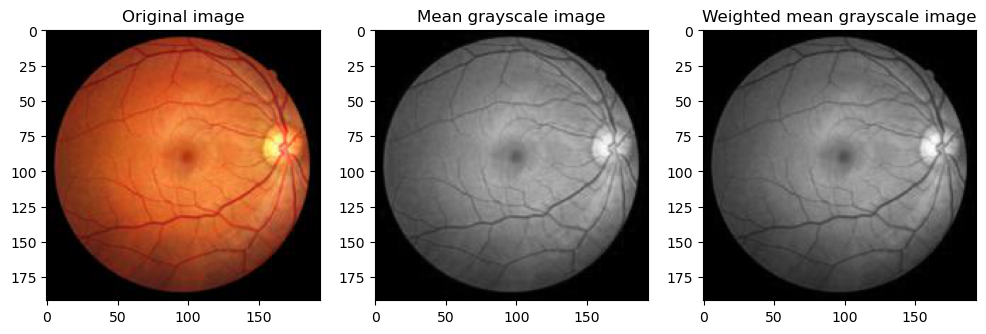

In [5]:
# ====== YOUR CODE: ======
# Load the colored image
rgb_img = plt.imread('images/retina.jpg')

# Convert to grayscale
titles = ['Original image', 'Mean grayscale image', 'Weighted mean grayscale image']
disp_img = [rgb_img, rgb2gray_mean(rgb_img), rgb2gray_weighted(rgb_img)]

# Display
plt.figure(figsize=(12,12))
for i in range(3):
  plt.subplot(1, 3, i+1), plt.imshow(disp_img[i], cmap='gray'), plt.title(titles[i])

plt.show()
# ========================

---

### Exercise 1

In many cases, you might get images that do not utilize the entire range of pixel values. <br> 
In these cases, the images will look too dim or too bright.   

First, we will implement a function that calculate the histogram of the image.<br>
**Do not use the function plt.hist() in this exersice.**<br>

1. Implement the function `img_hist_trivial` that receives an image as a uint8 numpy array and returns its histogram. Calcultat the histogram in the trivial way; going over the gray values and count them in the image.

    Write a description of your function and explain its inputs and output.


In [6]:
def img_hist_trivial(img: np.ndarray)-> np.ndarray:
    
    '''
    The function gets an image and return its gray values histogram by going over every pixel and count its gray value.

    :param img: uint8 numpy array of an image
    :return hist: histogram with 256 cells with the number of pixels with each gray value.
    '''
        
    # ====== YOUR CODE: ======
    hist = np.zeros(256)
    img_flat = img.flatten()
    
    for gray_value in range (256):
        for cell in range (img_flat.size):
            if img_flat[cell] == gray_value:
                hist[gray_value] += 1
    # ========================
    
    return hist


2. What is the computational complexity of the above function? 
    
    **Answer:** In this case we are following each row (m) and each columns (n). we perform this action for 256 gray values. Therefore, the computational complexity of the above function is O(mXnX256).

3. Implement the function `img_hist_advanced` that receives an image as a uint8 numpy array and returns its histogram. This time, calculate the histogram such the computational complexity is lower. Think of a way that you go over the image just once. 


In [15]:
def img_hist_advanced(img: np.ndarray)-> np.ndarray:
    
    '''
    The function gets an image and return its gray values histogram.
    
    :param img: uint8 numpy array of an image.
    :return hist: histogram with 256 cells with the number of pixels for each gray value.
    '''
        
    # ====== YOUR CODE: ======
    hist = np.zeros(256)
    img_flat = img.flatten()

    for cell in range(img_flat.size):
        gray_value = img_flat[cell]
        hist[gray_value] += 1
    # ========================
    
    return hist

4. What is the computational complexity of the above function? 
    
    **Answer:** The loop iterates over each pixel in the image once, which is O(N), where N is the total number of pixels in the image.
    
    Inside the loop, for each pixel, the function increments the corresponding bin in the histogram array. This operation is O(1) because it involves a constant-time array lookup and addition.
    
    Creating and returning the histogram array: After processing all pixels, the function creates the histogram array with 256 bins, which is O(256) = O(1) since the number of bins is constant.
    
    Overall, the dominant factor in the computational complexity is N.


5. Load the image 'chest.jpg'. Measure the execution time of the functions `img_hist_trivial` and `img_hist_advanced` on that image.


In [ ]:
# ====== YOUR CODE: ======
import timeit
img = plt.imread('images/chest.jpg')
%timeit img_hist_trivial(img)
%timeit img_hist_advanced (img)
# ========================

6. Get the histogram of the chest image using one of the function you implemented. Display the image and its histogram. 
    Add titles to the figures and labels where is needed. <br> 

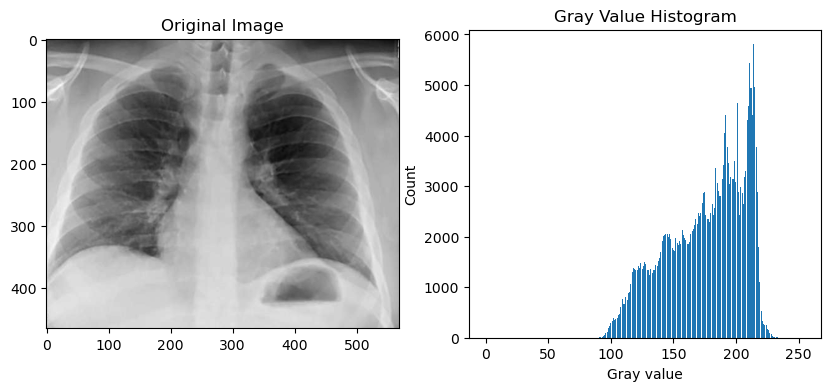

In [17]:
# ====== YOUR CODE: ======
img = plt.imread('images/chest.jpg')
histogram = img_hist_advanced(img)

# Display
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.title('Original Image'), plt.imshow(img, cmap='gray')
plt.subplot(1,2,2), plt.title('Gray Value Histogram'), plt.bar(range(256),histogram), plt.xlabel('Gray value'), plt.ylabel('Count')
plt.show()
# ========================

7. Implement the funciton `hist_eq` that receives an image as a uint8 numpy array and performs histogram equalization on that image. The output image's data type has to be uint8 as well.  <br>
     Write a description of your function and explain its inputs and output.<br>
     **Do not use the function np.cumsum()**


In [18]:
def hist_eq(img: np.ndarray) -> np.ndarray:
    '''
    The function gets an image and performs histogram equalization.
    
    :param img: uint8 numpy array of an image  
    :returm img_cum: image after performing histogram equalization to its gray values.
    '''  
        
    # ====== YOUR CODE: ======
    hist = img_hist_advanced(img)
    norm_hist = hist/img.size
    com_norm_hist = []
    
    for i in range(256):
        j = np.sum(norm_hist[:i])
        com_norm_hist.append(j)
    
    com_norm_hist = np.array(com_norm_hist)
    transform_map = (255*com_norm_hist).astype(np.uint8)
    
    eq_img = transform_map[img]

    # ========================
    
    return eq_img


8. Apply histogram equalization on the chest image using the function `hist_eq` and display the transformed image and its histogram using the function `img_hist_advanced` you've implemented. <br>
    Add titles to the figures and labels where is needed.


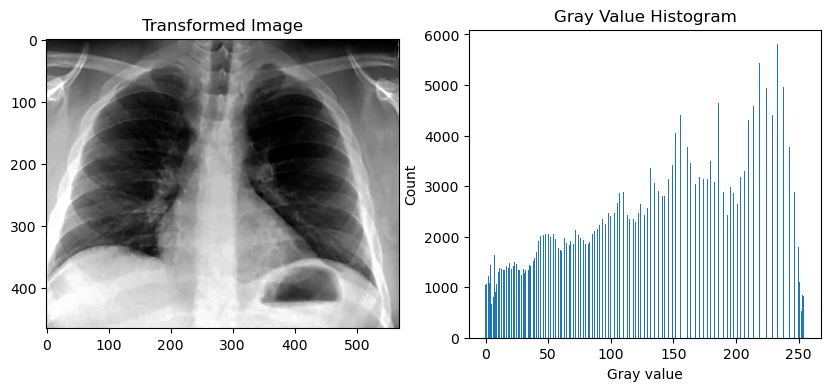

In [19]:
# ====== YOUR CODE: ======
chest_img = plt.imread('images/chest.jpg')
trans_img = hist_eq(chest_img)
histogram = img_hist_advanced(trans_img)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Transformed Image'), plt.imshow(trans_img, cmap='gray')
plt.subplot(1,2,2)
plt.title('Gray Value Histogram'), plt.bar(range(256),histogram), plt.xlabel('Gray value'), plt.ylabel('Count')

plt.show()
# ========================

9. Did you get a flat histogram after histogram equalization? Explain why yes or why not. 
    
    **Answer:** No, I did not get a flat histogram after histogram equalization.Histogram equalization stretches the range of the actual used gray values in the image but the number of pixels that represented by the same value is the same so the 'count' axis will not be equal for all valus.

10. Linear contrast stretching, histogram equalization, and CLAHE are all methods that aim to stretch out the intensity range. Explain the main differences between these methods and when one is preferred over the other.

    **Answer:**

    **Linear contrast stretching:** expands uniformly the image intensity range in order to increase the contrast. It match the minimum/maximum values of the intensity with the minimum/maximum value of the gray range and spread the rest of the intensity values between.
    This method won't be affective if the minimum/maximum values of the image intensity are close to 0 and 255.

    **Histogram equalization:** Stretching the intensity range of the image by spreading the most frequent intensity in order to increases the global contrast. 
    Using this method, the Shape of the histogram changes and the original image can't be reprduced. 

    **Contrast limited adaptive histogram equalization (CLAHE):** performing histogram equalization on divided blocks of the image in order to reduce noise.


---

###  Exercise 2


1. Implement the function `conv2D` that takes in an image and a filter in the form of 2D numpy arrays, and returns the convolution product of the two arrays such that the output will have the same shape as the input image. <br>
    You can assume: zero padding, the image class is uint8, and the filter's shape is (k,k).<br>
    **Do not use the functions np.pad()**
    
     Write a description of your function and explain its inputs and output.


In [28]:
def conv2D(img: np.array, kernel: np.ndarray)-> np.ndarray:
    '''
    The function conv2D gets an image and a kernel filter and returns their convolution product by shifting the kernel across the image.
   
    :param img: uint8 numpy array image
    :param kernel: kXk numpy array of the kernel filter
    :returm conv_img: image-sized numpy array of the convulation product of the image with the kernel. 
    ''' 

    # ====== YOUR CODE: ======
    img_rows, img_cols = img.shape

    k = kernel.shape[0]
    diff = int(np.floor(k/2))
    
    pad_img = np.zeros([img_rows+2*diff, img_cols+2*diff])
    pad_img[diff:-diff, diff:-diff] = img
    
    conv_img = np.zeros_like(img)
    for i in range(img_rows):
        for j in range(img_cols):
            conv_img[i][j] = np.sum(pad_img[i:i+k, j:j+k] * kernel) 

    # ========================
    
    return conv_img

2.  Load the image 'retina_noisy.jpg' and apply 3X3 mean filter.<br>
    Display in one figure the original image, the filtered image and the difference between them. Add titels.

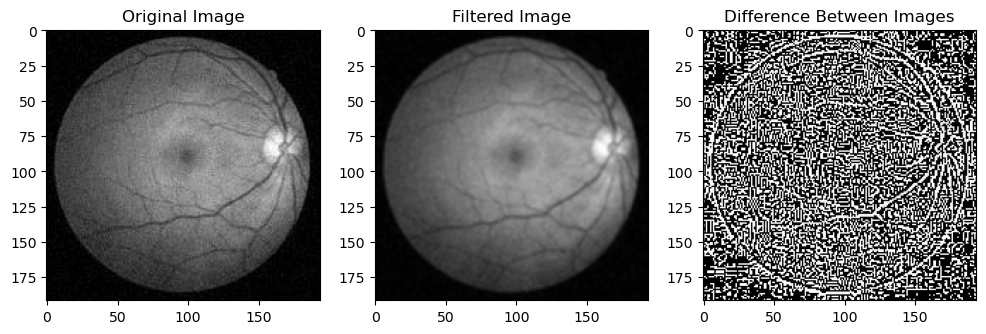

In [38]:
# ====== YOUR CODE: ======
orig_img = plt.imread('images/retina_noisy.jpg')
mean_filter = 1/9 * np.ones((3,3))
conv_img = conv2D(orig_img, mean_filter)
diff = orig_img - conv_img

titles = ['Original Image', 'Filtered Image', 'Difference Between Images']
disp_img = [orig_img, conv_img, diff]

# Display
plt.figure(figsize=(12,12))
for i in range(3):
  plt.subplot(1, 3, i+1), plt.imshow(disp_img[i], cmap='gray'), plt.title(titles[i])

plt.show()
# ========================

3. What kind of noise would **not** be optimally filtered by a Gaussian or a bilateral filter and especially if the range variance parameter is low? how would you filter this noise?
    
    **Answer:** Gaussian filter is blurring the image by Gaussian function and bilateral filter is replacing the pixels with the avaraged weight of its neighbors. these filters are sensitive to outlaires and will not optimally filter noise such as Salt-and-pepper which charachterized by random black and white pixels. 
    I would filter this noise by using median filter which replace the central value of the neighbors (random white and black pixels) so the image will be optimally filtered.

4. **Bonus:** (10 points)

    Another way to calculate the convolution product between an image and kernal is shifting the image instead of moving the kernel accros the image. 
Implemet the function `conv2D_shift_img` that takes in an image and a filter in the form of 2D numpy arrays, and returns the convolution product according to the above method.<br> 
The output should have the same shape as the input image.<br>
You can assume: zero padding, the image class is uint8, and the filter's shape is (k,k).

    Write a description of your function and explain its inputs and output.

In [39]:
def conv2D_shift_img(img: np.array, kernel: np.ndarray)-> np.ndarray:
    '''
    The function conv2D_shift_img gets an image and a kernel filter and returns their convolution product by shifting the image.

    :param img: uint8 numpy array image
    :param kernel: kXk numpy array of the kernel filter
    :returm conv_img: image-sized numpy array of the convulation product of the image with the kernel.
    ''' 

    # ====== YOUR CODE: ======
    img_rows, img_cols = img.shape

    k = kernel.shape[0]
    diff = int(np.floor(k/2))
    diffx = int((img_rows - diff)) 
    diffy = int((img_cols - diff))

    pad_krnl = np.zeros([k+2*diffx, k+2*diffy])
    pad_krnl[diffx:-diffx, diffy:-diffy] = kernel

    conv_img = np.zeros_like(np.flip(img))
  
    for i in range(img_rows):
        for j in range(img_cols):
            conv_img[j][i] = np.sum(pad_krnl[i:i+img_rows, j:j+img_cols] * img) 

    # ========================
    return conv_img

---

###  Exercise 3

1. Implement the function `bilateral_kernel` that takes in a region of an image and returns the value of its central pixel after filtering by a bilateral filter.<br>
    All images should be in an 8-bit format. Try to avoid using loops.    
     Write a description of your function and explain its inputs and output.


In [23]:
def bilateral_kernel(region: np.array, spatial_std: float, range_std: float)-> int:
    
    '''
    bilateral_kernel function gets an image's region with wanted STD values, and returns the central pixel value of a bilateral filtered image.
    
    :param region: uint8 numpy array of the wanted region of an image
    :param spatial_std: filter's spatial standard deviation
    :param range_std: filter's range standard deviation
    :returm filtered_pixel: the central pixel value of the image after bilateral filtering.
    ''' 

    # ====== YOUR CODE: ======
    k_rows, k_cols = region.shape
    mid_row, mid_col = int(k_rows/2), int(k_cols/2)

    filtered_pixel = 0
    wp = 0
    for i in range(k_rows):
        for j in range(k_cols):
            
            s_dist = (mid_row-i)**2 + (mid_col-j)**2
            r_dist = (region[mid_row, mid_col] - region[i, j])**2
            w = np.exp((-0.5*s_dist/spatial_std**2) + (-0.5*r_dist/range_std**2)) 
            wp += w
            
            filtered_pixel += w*region[i, j]

    filtered_pixel = (filtered_pixel/wp).astype(int)
    # ========================
    
    return filtered_pixel

2. Implement the function `bilateral_filter` that takes in an image and performs bilateral filtering on it.<br>
    All images should be in an 8-bit format.<br>
    Set default values for the arguments kernel_size, range_std and spatial_std.<br>
    Write a description of your function and explain its inputs and output.


In [40]:
def bilateral_filter(img: np.array, kernel_size: int, range_std: float, spatial_std: float)-> np.ndarray:
    '''
    bilateral_filter function gets an image and perform a bilateral filtering on.
    
    :param img: uint8 numpy array of an image
    :param kernel_size: the size k of the kernel [k,k]
    :param range_std: filter's range standard deviation
    :param spatial_std: filter's spatial standard deviation
    :returm filtered_img: uint8 numpy array of the image after bilateral filtering
    ''' 

    # ====== YOUR CODE: ======
    img_rows, img_cols = img.shape
    diff = int(np.floor(kernel_size/2))

    # pad_img = np.pad(img, diff, constant_values=0)
    pad_img = np.zeros([img_rows+2*diff, img_cols+2*diff])
    pad_img[diff:-diff, diff:-diff] = img

    filtered_img = np.zeros_like(img)
    for i in range(img_rows):
        for j in range(img_cols):
            blf_region = pad_img[i:i+kernel_size, j:j+kernel_size]
            filtered_img[i][j] = bilateral_kernel(blf_region, spatial_std, range_std)

    filtered_img = filtered_img.astype('uint8')

    # ========================
    
    return filtered_img

3. Apply Bilateral filter on the image 'retina_noisy'<br>
    Set the values of the range std and the spatial std to be 9 and the value of the kernel size according to the below note.  <br>
    Note: Bilateral filter is composed of two gaussian filters. As you know, most of the gaussian lies within three standard deviations away from the mean. <br>
    Display in one figure the original image, the filtered image and the difference between them. Add titels.


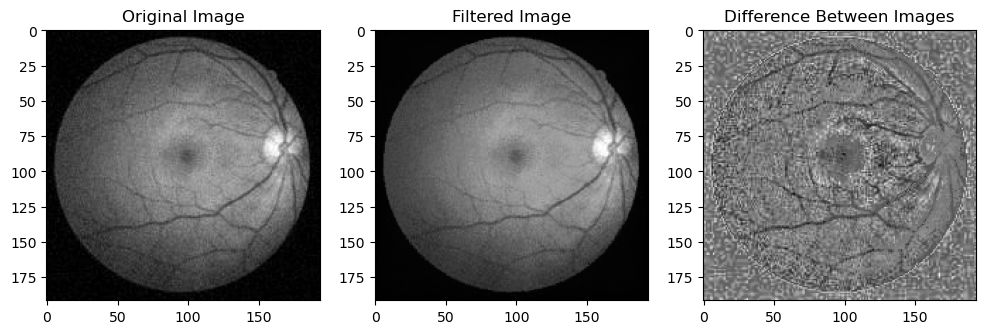

In [42]:
# ====== YOUR CODE: ======
orig_img = plt.imread('images/retina_noisy.jpg')
kernel = 27
r_std = 9
s_std = 9

blf_img = bilateral_filter(orig_img, kernel, r_std, s_std)

titles = ['Original Image', 'Filtered Image', 'Difference Between Images']
disp_img = [orig_img, blf_img, orig_img-blf_img.astype(int)]

# Display
plt.figure(figsize=(12,12))
for i in range(3):
  plt.subplot(1, 3, i+1), plt.imshow(disp_img[i], cmap='gray'), plt.title(titles[i])

plt.show()
# ========================

4. Choose three different parameter spatial std and range_std values and show the filtered images (overall 9 images).<br>
    Display the images in a grid where the spatial std is constant along the rows and the range std is constant along the columns. Add titles to the images. <br>
    The kernel_radius value can remain the same as in the previous section.

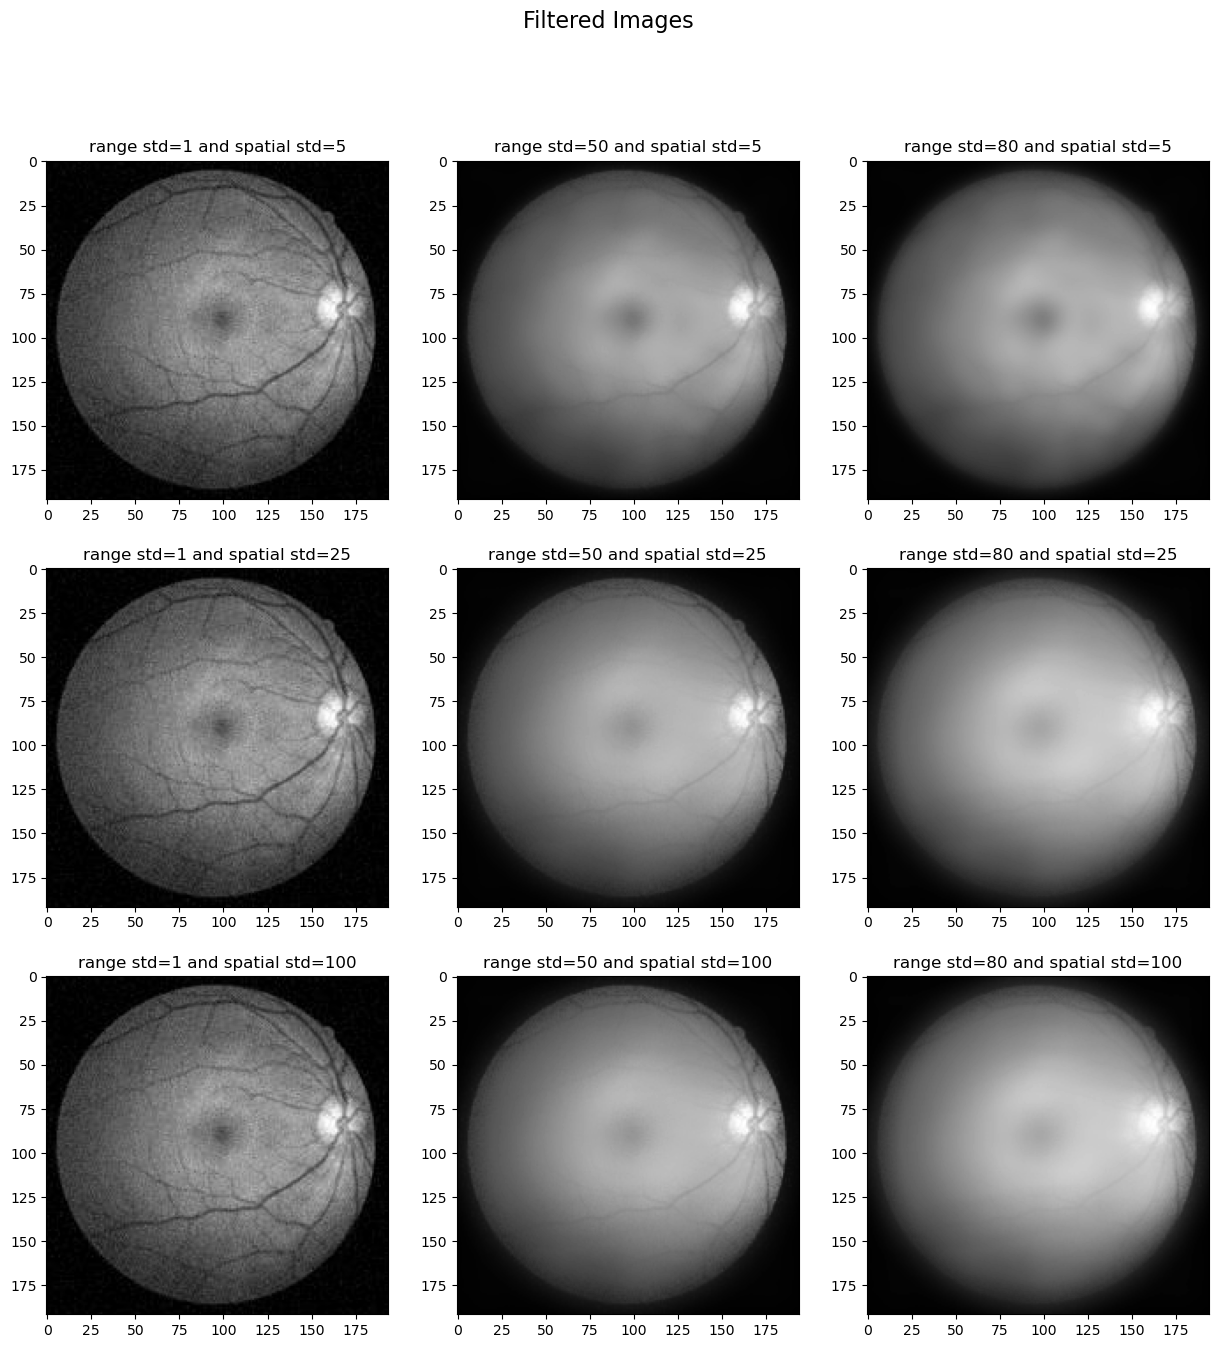

In [26]:
from matplotlib import figure
# ====== YOUR CODE: ======
img = plt.imread('images/retina_noisy.jpg')
kernel_size = 27
range_std = [1, 50, 80]
spatial_std = [5, 25, 100]

fig = plt.figure(figsize=(15,15))
fig.suptitle('Filtered Images', fontsize=16)

i = 0

for s in spatial_std:
    for r in range_std:
      blf_img = bilateral_filter(img, kernel_size, r, s)

      plt.subplot(3, 3, i+1)  
      plt.imshow(blf_img, cmap='gray')
      plt.title(f'range std={r} and spatial std={s}')

      if i == 9:
        break
      i += 1

plt.show()
# ========================

5. What are the benefits of using a bilateral filter instead of a Gaussian filter?
    
    **Answer:** Both filters are used in order to smooth the image and reduce the noice. The benefit of using a bilateral filter is that it preserves image edges while the gaussian filter smoothes the whole image.